<a href="https://colab.research.google.com/github/QOneK/Ryerson-Data-Analytics-Final-Project-for-Kyuhwan-Kim/blob/master/Data_Analytics_Final_Project_for_Kyuhwan_Kim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analytics Final Project for Kyuhwan Kim**

---
Dateset can be found at:
https://www.kaggle.com/aaron7sun/stocknews


# Importing files into Google Colabs

---



Import the necessary libraries: Pandas, Numpy, Matplotlib and sklearn

*More libraries can be found later lines of code in machine learning section

In [303]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

These are the urls for the dataset files which can be found via Github

In [304]:
url_combined = 'https://raw.githubusercontent.com/QOneK/Ryerson-Data-Analytics-Final-Project-for-Kyuhwan-Kim/master/Dataset/Combined_News_DJIA.csv'
url_reddit = 'https://raw.githubusercontent.com/QOneK/Ryerson-Data-Analytics-Final-Project-for-Kyuhwan-Kim/master/Dataset/RedditNews.csv'
url_djia = 'https://raw.githubusercontent.com/QOneK/Ryerson-Data-Analytics-Final-Project-for-Kyuhwan-Kim/master/Dataset/upload_DJIA_table.csv'

The .csv files are then declared with variables

In [305]:
reddit_djia = pd.read_csv(url_combined)
reddit = pd.read_csv(url_reddit)
djia = pd.read_csv(url_djia)

# EDA (Exploratory Data Analysis)

---



## EDA (Exploratory Data Analysis)

### EDA for Reddit Dataframe

.info() method allowed to see what the name of attributes, number of rows and the data types of the columns



In [306]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73608 entries, 0 to 73607
Data columns (total 2 columns):
Date    73608 non-null object
News    73608 non-null object
dtypes: object(2)
memory usage: 1.1+ MB


Used the .min() and .max() method to find the range of the dates

In [307]:
#to find the minimum date of reddit
reddit['Date'].min()

'2008-06-08'

In [308]:
#to find the maximum date of reddit
reddit['Date'].max()

'2016-07-01'

.nunique() method allowed to see how many unique dates and articles that were present

In [309]:
#number of unique inputs 
reddit.nunique()

Date     2943
News    73537
dtype: int64

### EDA for DJIA Dataframe

.info() method allowed to see what the name of attributes, number of rows and the data types of the columns

In [310]:
djia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
Date         1989 non-null object
Open         1989 non-null float64
High         1989 non-null float64
Low          1989 non-null float64
Close        1989 non-null float64
Volume       1989 non-null int64
Adj Close    1989 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


Used .min() and .max methods to find the range of the dates. 

In [311]:
djia['Date'].min()

'2008-08-08'

In [312]:
djia['Date'].max()

'2016-07-01'

.describe() method allowed to display rudimentary statistics about the datasets. Based on experimentation, this works only with numeric datatypes. 

In [313]:
djia.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


Visual Representation DIJA (Dow Jones Industrial Average) "Adj Close" Trends
(It seems that there are up and down movements but a general downward trend with recovery at the end)

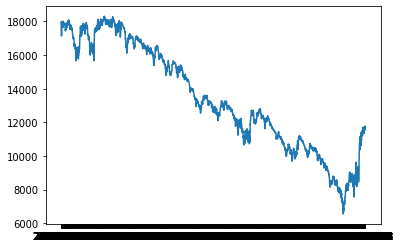

In [314]:
#this takes some time to run
plt.plot(djia['Date'],djia['Adj Close'])
plt.show()

In [315]:
"""
Noticed that the dates were descending, 
to get a more accurate picture, we need to do ascending for the dates
"""
djia.sort_values(by = ['Date'], inplace=True, ascending=True)
djia.reset_index(drop=True, inplace=True)

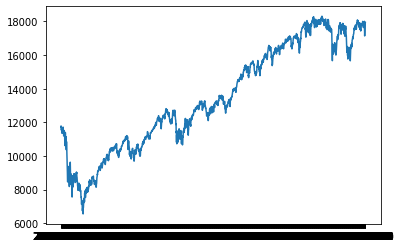

In [316]:
#This is the "correct" plot from early (left) to later (right)
plt.plot(djia['Date'],djia['Adj Close'])
plt.show()

### EDA for reddit_djia Dataframe 
This is the "cleaned" dataset; combination of both news and DJIA (adj price) label. 

In [317]:
reddit_djia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 28 columns):
Date           1989 non-null object
Label          1989 non-null int64
Top1           1989 non-null object
Top2           1989 non-null object
Top3           1989 non-null object
Top4           1989 non-null object
Top5           1989 non-null object
Top6           1989 non-null object
Top7           1989 non-null object
Top8           1989 non-null object
Top9           1989 non-null object
Top10          1989 non-null object
Top11          1989 non-null object
Top12          1989 non-null object
Top13          1989 non-null object
Top14          1989 non-null object
Top15          1989 non-null object
Top16          1989 non-null object
Top17          1989 non-null object
Top18          1989 non-null object
Top19          1989 non-null object
Top20          1989 non-null object
Top21          1989 non-null object
Top22          1989 non-null object
Top23          1988 non-null o

In [318]:
reddit_djia.describe()

,Label,Unnamed: 27
count,1989.000000,0.0
mean,0.535445,NaN
std,0.498867,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,1.000000,NaN
75%,1.000000,NaN
max,1.000000,NaN


How many of the rows are 1? 0? in the class label

In [319]:
reddit_djia['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

There appears to be more 1 (up) than 0 (down). However, from the trendline from DJIA Adj Price, we can see that there is actually a downward trend. Perhaps the magnitude of the up/down wasn't taken into consideration. 

This is to check the date range. From observation, we can see that the date range of the final "cleaned" dataset matches that of DIJA dataset. There seems to be extra erraneous data at the news dataset. 

In [320]:
reddit_djia['Date'].min()

'1/10/2011'

In [321]:
reddit_djia['Date'].max()

'9/9/2015'

Plot Pie graph of Label
https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

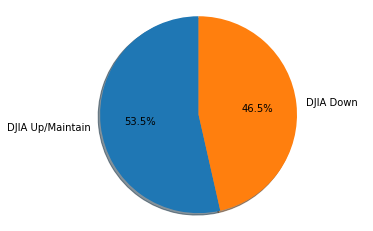

In [322]:
labels = 'DJIA Up/Maintain', 'DJIA Down'
sizes= [1065/1989, 924/1989]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Checking if there are null values 

Check if there are null values that needs to be dealt with before merging the data. We can see that there were no null values. 

In [323]:
#check null values for reddit
reddit.isnull().values.sum()

0

In [324]:
#check null values for djia
djia.isnull().values.sum()

0

# Combining Reddit articles with DJIA datasets to create "cleaned, final" dataset



Result: 
cleaned final dataset named "**result**"

The final cleaned dataset will be created using this procedure:

a) create an extra column called 'Label' (which are the difference between proceeding day)

b) using an if-statement, categorize:
   1 (up) when DJIA increased or maintained the same
   0 (down) when DJIA decreased

c) organize the articles into the corresponding dates. This will involve grouping the articles into similar dates. 

d) merge the DJIA 'Label' column and the articles on 'Dates' column. 

## Creating DJIA 'Label'




I have noticed that the dates of DJIA and Reddit datasets are in asc/desc order. For ease of cleaning, before the label is created, instead of desc, use asc order for the djia dataset.

In [325]:
#https://datatofish.com/sort-pandas-dataframe/
djia2 = djia.copy()
djia2.sort_values(by = ['Date'], inplace=True, ascending=True)

Copy 'Adj Close' column and run .diff() method on the column to see the day by day changes in the DJIA.

In [326]:
djia2['Diff']= djia2['Adj Close']

#https://stackoverflow.com/questions/39479919/how-do-i-subtract-the-previous-row-from-the-current-row-in-a-pandas-dataframe-an
djia2['Diff']=djia2.Diff.diff()

In [327]:
#This is run just in case there are N/A values. These will be filled with zeros. 
djia2=djia2.fillna(0)

This section will take the values of 'Diff' column and using if clauses, determine the value of the class variable.

In [328]:
#https://guillim.github.io/pandas/2018/10/22/Pandas-if-else-on-columns.html

conditions = [
    (djia2['Diff'] >= 0.0),
    (djia2['Diff'] < 0.0)]
choices = [int(1),int(0)]

djia2['Label'] = np.select(conditions, choices, default='null')

This section is to reset the index [count row from 0 onwards]. Prior to input of this code, the index would go in desc order from index 1989. 

In [329]:
djia2.reset_index(drop=True, inplace=True)
djia2.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Diff,Label
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.000000,1
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,48.029297,1
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-139.879882,0
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-109.509766,0
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,82.969727,1


The first label by default should be 0 even though Diff = 0.0
This was manually added since the previous block of code didn't account for the exception of the first label value. 

In [330]:
djia2.iloc[0,-1]=int(0)

In [331]:
djia2.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Diff,Label
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.000000,0
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,48.029297,1
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-139.879882,0
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-109.509766,0
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,82.969727,1


Prior to casting the Label column as integer, the column was an object. Changed since it is numerical value; more specifically integer. 

In [332]:
djia2['Label'] = djia2['Label'].astype('int')

## Reorganizing Reddit News Dataset

Initally, the dataset had two columns: Date, News

The dataset was formated so that each row is organized in following fashion: 
Date, Top1 ... Top25 

Basically, the news articles were compiled into one single date and outputted horizontally. 

On the news dataset, this portion of code will organize the news articles into its corresponding dates using list of lists.

In [333]:
#This is for .at function
#https://www.geeksforgeeks.org/python-pandas-dataframe-at/

#declaration of variables
previous_date = reddit.at[0, 'Date']
newslist= []
sub_newslist = []
date_list = [previous_date]

"""
This 'for loop' will iterate from the beginning to the end of the list of dataset

Each iteration of the loop, the Date column will go down. The date variable will 
be the new date value. Also, News will be stored into sub_newslist(temp list for storing articles in a single date)
At the end of the loop, the 

The 'if statement' will be activated when the value of 'Date' changes. 

When the if statement is run:
a) the date value will be inputted towards date_list list
b) values collected in sub_newslist will be inputted into newslist list
c) sub_newslist list (used as a temp collector) will be emptied 
"""

for i in range(0,len(reddit['Date'])):
  date = reddit.at[i,'Date']
  if date != previous_date:
    date_list.append(date)
    newslist.append(sub_newslist)
    sub_newslist = []
  sub_newslist.append(reddit.at[i,'News'])
  previous_date = date

#last date needs a seperate code to add articles of final date into newslist list
newslist.append(sub_newslist)

#various print statements to check that the articles are organized correctly

"""
print(newslist[0][0])
print(newslist[-1][-1])
print(newslist[-1])
print(len(newslist))
print(len(date_list))
print(date_list[0])
print(date_list[-1])
"""

'\nprint(newslist[0][0])\nprint(newslist[-1][-1])\nprint(newslist[-1])\nprint(len(newslist))\nprint(len(date_list))\nprint(date_list[0])\nprint(date_list[-1])\n'

This portion of code will take the list and output them into a correct dataframe format

---



This code will create the labels for Top 25 articles. 

In [334]:
"""
f is f string. allows for consistency in formatting
"""
top25_labels = [f'Top{str(integer)}' for integer in list(range(1,26))]
top25_labels

['Top1',
 'Top2',
 'Top3',
 'Top4',
 'Top5',
 'Top6',
 'Top7',
 'Top8',
 'Top9',
 'Top10',
 'Top11',
 'Top12',
 'Top13',
 'Top14',
 'Top15',
 'Top16',
 'Top17',
 'Top18',
 'Top19',
 'Top20',
 'Top21',
 'Top22',
 'Top23',
 'Top24',
 'Top25']

This portion of code will output the joint database.

In [335]:
#variable declaration
relevant_dates_with_news = []
cols = []

#loop will iterate from beginning to end of the dates (created from previous block of code)
#each line of output from 'relevant_dates_with_news' will output the entire corresponding row
#to a specific date 

for i in range(0,len(date_list)):
  #date_with_news is a temporary list collector, that's why inside the loop
  date_with_news = []
  date_with_news.append(date_list[i])
  date_with_news.extend(newslist[i])
  relevant_dates_with_news.append(date_with_news)

#This portion of code makes the dataframe with the header
cols.append('Date')
cols.extend(top25_labels)
df = pd.DataFrame(columns=cols)

#The loop inside loop, relevant_dates_with_news will iterate all the dates from 
#The break component ensures that each line has max of 25 articles. 
for j in range(0, len(relevant_dates_with_news)):
  for k in range(0, len(relevant_dates_with_news[j])):
    if k > 25:
      break
    df.at[j, cols[k]] = relevant_dates_with_news[j][k]

df.head(2)

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2016-07-01,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
1,2016-06-30,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...


## Combining the cleaned DJIA and Reddit datasets

The finalized databases are merged. The 'djia' is the base database where the newly created 'df' database will merge on 'Date' column. As of result,
we expect the erraneous dates from the Reddit News will be automatically cropped
if the date range goes beyond DJIA information.

In [336]:
result_all = pd.merge(djia2, df, how='inner', on=['Date'])

'result_all' will have all the necessary data. This can be used to do quantitative analysis as well. 

However, for classification, we can crop for only necessary 

In [337]:
"""
CAUTION: Run this code ONLY once. Since, the drop code if run again will remove 
more columns than necessary

If unappropriate result appears, run the previous block of code to reset 
result variable and run this portion again

The result should have Date, Label, Top1 .. Top 25 columns
"""
result = result_all.copy() 
#learnt that without .copy(), changes are also made to the original dataset
result.drop(result.iloc[:, 1:8], axis=1, inplace=True)
result.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."


This portion of code tests whether or not each row has 25 articles. 
We find that there are some null values present. 

With this info, manually checked...

**Though no columns had >25 articles, it was found that there were some dates with <25 articles.**

In [338]:
"""
This portion of code found that BEFORE EVEN CLEANING DATA that there were some dates where it did not =25 articles

Luckily, most can be neglected since when the dates are merged, most were taken out.

However, it was later found that even after merging that some dates had <25 because of null values
"""

a = list(reddit['Date'])

a,b = np.unique(a, return_counts=True)
a[b != 25]

array(['2008-10-26', '2009-09-05', '2009-09-12', '2009-09-13',
       '2009-09-15', '2009-09-19', '2009-09-20', '2009-09-26',
       '2009-10-10', '2009-10-25', '2009-12-24', '2011-04-21'],
      dtype='<U10')

This was a test to see where the NaN data can be found with the final dataset.

The original dataset also had the NaN at the same locations. 
Therefore, the accuracy to replicate the finished clean data was a sucess. 

The missing data can be neglegible since there aren't many NaN
and there are enough articles for even the non =25 article dates to run machine learning. 

---



This portion of code finds the NaN values on 'result' dataframe. 

Even when the dataset is fully 'cleaned', there are some issues to be dealt with.

In [339]:
#https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null
null_columns=result.columns[result.isnull().any()]
print(result[result.isnull().any(axis=1)][null_columns].head())

                                                 Top23 Top24 Top25
277                                                NaN   NaN   NaN
348  b"Ayatollah Montazeri's Legacy:  In death he m...   NaN   NaN
681          Prince Charles wins some kind of a record   NaN   NaN


In [340]:
"""
Dates where the missing data can be found. With more detail
Scroll horizontally to the end to find some NaN values. 
"""

#https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

result.iloc[[277,348,681]]

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
277,2009-09-15,1,b'The Church of Scientology won\'t be dissolve...,b'New virus from rats can kill 80 per cent of ...,b'The gruesome spectacle of dolphins being sla...,b'The End of Innocence in Afghanistan: \'The G...,b'France approves Internet piracy bill',b'The Rural Doctors Association says right now...,b'Al Jazeera English - Africa - Shabab to aven...,"b""How Sri Lanka governs through detentions - S...",...,b'In an equine echo of the controversy surroun...,b'UPDATE: 5-New York homes raided in terrorism...,b'Population Growth Impeding Progress on the M...,b'Global Population to Reach 7 Billion by 2011',b'Government Funded Feminist Porn ',b'Can someone enlighten me re:Holy Land disput...,b'Human Rights Watch official suspended for co...,NaN,NaN,NaN
348,2009-12-24,1,b'Woman knocks down Pope Benedict at Christmas...,b'Ugandan President Museveni says he will bloc...,"b""Venezuela's Chavez threatens to kick out car...",b'Woman who knocked down pope had pasta in her...,"b'450 people from 21 countries, including 30 f...",b'Chvez declares Angel Falls is no more: World...,b'Drug tests catch out 10 police (UK)',"b'Once the worlds fourth-largest lake, the Ara...",...,b'Pig farts spark Australia gas scare - I shit...,b'Bin Laden daughter flees to Saudi embassy in...,b'Traumatic Brain Injuries: Growing evidence ...,b'The Pakistan Supreme Court has ordered the P...,"b""Here's a video the Taliban released this mor...",b'Fireworks set off aboard airliner',"b'Five VA men may face terrorism charges, Paki...","b""Ayatollah Montazeri's Legacy: In death he m...",NaN,NaN
681,2011-04-21,1,"Director of ""Restrepo"" and Photographer Chris ...",Everyone within 20km of Fukushima will be forc...,Bahrain: Activist Zaynab Al-Khawaja's letter t...,"More than 80,000 people are claiming incapacit...",Libya: 'mission creep' claims as UK sends in m...,Japan considers banning access to evacuation zone,Chinese oil giant Sinopec has stopped exportin...,6.0-magnitude earthquake strikes off east coas...,...,Russian migration official fired in racism row...,Small amounts of radioactive iodine found in b...,"War photographer, Oscar-nominated film directo...",Effeminate boys are being sent to a special ca...,Japan Government Declares 12-Mile Area Around ...,TEPCO admitted Wednesday that nuclear fuel in ...,Fukushima evacuees face arrest if they return ...,Prince Charles wins some kind of a record,NaN,NaN


Code to output the final cleaned data to file. 

When compared to final prepared data, the result was identical to the prepared data.

In [341]:
#To output the file (however, no preprocessing and feature engineering is required prior to machine learning)
result.to_excel("cleaned_data(with more processing required).xlsx")

# Natural Language Processing 

Although the dataset has been cleaned and combined, there are still more work to be done. 

We still need to pre-process the data so that the machine learning algorithm can take the input. 

## Loading Machine Learning (NLP) Libraries

In [342]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.linear_model import LogisticRegression

## Spliting Training and Testing Sets

According to the dataset provider, there were instructions about how to split the training and test datsets. 

"For task evaluation, please use data from 2008-08-08 to 2014-12-31 as Training Set, and Test Set is then the following two years data (from 2015-01-02 to 2016-07-01). This is roughly a 80%/20% split."



In [343]:
"""
When looking at the list of news, we observe that some some reason, that the news articles 
start with a lower case 'b' character followed by ' or ". 
ex. b' or b"

Therefore, first step was to remove that b' or b"
"""
#variable 'result_wo_b' is shorthand for result without b (b' or b")

#we later find out that this isn't necessary but was a good learning exp for regex
#also later discover that the end of sentence has punctuation remaining.

result.replace("b'|b\"", "", regex = True, inplace = True)
result.replace("\"|'$","", regex = True, inplace = True)
result.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.,Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,...,Georgia Invades South Ossetia - if Russia gets...,Al-Qaeda Faces Islamist Backlash,Condoleezza Rice: The US would not act to prev...,This is a busy day: The European Union has ap...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Ossetia,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge


In [344]:
result.iloc[0,2]

"Georgia 'downs two Russian warplanes' as countries move to brink of war"

In [345]:
"""
Experimented with train = result['Date'] < '2015-01-01' but this gave a boolean result.
Therefore, result[true values], the values that match the conditions were ouputted with final code.
"""
#in the future attempts train and test will use 'result' 
#for test and training datasets
train = result[result['Date'] < '2015-01-01']
test = result[result['Date'] > '2014-12-31']

In [346]:
print(train.shape)

(1611, 27)


So in testing data, there is a total of 1611 rows and 27 columns

In [347]:
print(test.shape)

(378, 27)


In training data, there are 378 rows and 27 columns

In [348]:
test['Label'].value_counts()

1    193
0    185
Name: Label, dtype: int64

Therefore, to have 100% accuracy, the machhine would have to guess correctly, 193 True and 0 False for the Test data

## First Attempt 

In [349]:
"""
This selects just the news articles (dependent features). 
This is where text feature engineering will be focused on
"""
data = train.iloc[:,2:27]
data.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.,Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,Georgian troops retreat from S. Osettain capit...,Did the U.S. Prep Georgia for War with Russia?,...,Georgia Invades South Ossetia - if Russia gets...,Al-Qaeda Faces Islamist Backlash,Condoleezza Rice: The US would not act to prev...,This is a busy day: The European Union has ap...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Ossetia,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge


In [350]:
"""
Converting to lower case characters
"""
#Reason is for consisentcy. For instance, georogia and Georgia will be counted as different words
#Therefore, by having all words in upper/lower case, we eliminate redundancy

for index in data:
  data[index] = data[index].str.lower()

data.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,georgia 'downs two russian warplanes' as count...,breaking: musharraf to be impeached.,russia today: columns of troops roll into sout...,russian tanks are moving towards the capital o...,"afghan children raped with 'impunity,' u.n. of...",150 russian tanks have entered south ossetia w...,"breaking: georgia invades south ossetia, russi...",the 'enemy combatent' trials are nothing but a...,georgian troops retreat from s. osettain capit...,did the u.s. prep georgia for war with russia?,...,georgia invades south ossetia - if russia gets...,al-qaeda faces islamist backlash,condoleezza rice: the us would not act to prev...,this is a busy day: the european union has ap...,"georgia will withdraw 1,000 soldiers from iraq...",why the pentagon thinks attacking iran is a ba...,caucasus in crisis: georgia invades south ossetia,indian shoe manufactory - and again in a seri...,visitors suffering from mental illnesses banne...,no help for mexico's kidnapping surge


In [362]:
"""
Removing punctuations

https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string

"""
data.replace("[^\w\s]","", regex = True, inplace = True)
data.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,georgia downs two russian warplanes as countri...,breaking musharraf to be impeached,russia today columns of troops roll into south...,russian tanks are moving towards the capital o...,afghan children raped with impunity un officia...,150 russian tanks have entered south ossetia w...,breaking georgia invades south ossetia russia ...,the enemy combatent trials are nothing but a s...,georgian troops retreat from s osettain capita...,did the us prep georgia for war with russia,...,georgia invades south ossetia if russia gets ...,alqaeda faces islamist backlash,condoleezza rice the us would not act to preve...,this is a busy day the european union has app...,georgia will withdraw 1000 soldiers from iraq ...,why the pentagon thinks attacking iran is a ba...,caucasus in crisis georgia invades south ossetia,indian shoe manufactory and again in a serie...,visitors suffering from mental illnesses banne...,no help for mexicos kidnapping surge


In [363]:
"""
Sample code: combining the first column of articles into one paragraph
"""

#This is code to take first column and to combine the 25 articles into 1 paragraph
' '.join(str(x) for x in data.iloc[0,0:25])

'georgia downs two russian warplanes as countries move to brink of war breaking musharraf to be impeached russia today columns of troops roll into south ossetia footage from fighting youtube russian tanks are moving towards the capital of south ossetia which has reportedly been completely destroyed by georgian artillery fire afghan children raped with impunity un official says  this is sick a three year old was raped and they do nothing 150 russian tanks have entered south ossetia whilst georgia shoots down two russian jets breaking georgia invades south ossetia russia warned it would intervene on sos side the enemy combatent trials are nothing but a sham salim haman has been sentenced to 5 12 years but will be kept longer anyway just because they feel like it georgian troops retreat from s osettain capital presumably leaving several hundred people killed video did the us prep georgia for war with russia rice gives green light for israel to attack iran says us has no veto over israeli 

In [364]:
"""
Combining each column of articles into one paragraph
with loop iteration for the entire dataset
"""

headline = []

for row in range(0,len(data[index])):   #len(data[index])=1611
  headline.append(' '.join(str(x) for x in data.iloc[row,0:25]))

#the 25 articles have been compiled into one paragraph
headline[-1]

'airasia flight found at the bottom of the java sea north korean defector details human experiments  use of mentally and physically handicapped children in chemical weapons tests the last straw korean air exexecutive cho hyunah arrested  earlier she ordered a plane to turn back on the runway in new york after nuts were served in a bag not on a plate south korean to drop sony film the interview in north korea by balloon us opening of oil export widens battle the obama administration has opened a new front in the global battle for oil market share effectively clearing the way for the shipment of as much as a million barrels per day of ultralight us crude to the rest of the world fbi agents investigating the sony pictures hack were briefed monday by a security firm that says its research points to laidoff sony staff not north korea as the prepatrator indian government orders blocking of 32 websites including github archiveorg sourceforge russia annual inflation jumps to 114 as rouble fall

Bag of Words

Theory is that the more frequent a word, the more important the word might be.
Therefore, a method to determine significant words in a text.



In [365]:
"""
Implement Bag of Words
"""
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#

countvector = CountVectorizer(ngram_range=(1,1))
#(1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. 

traindataset = countvector.fit_transform(headline)

Try changing from unigram to bigram and notice the difference in the result!

In [366]:
print(traindataset.shape)

(1611, 36432)


In [367]:
"""
RandomForest Classifier
"""
randomclassifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [368]:
"""
Predict for the Test Dataset
"""
test_transformed = []

for row in range(0,len(test.index)):
  test_transformed.append(' '.join(str(x) for x in test.iloc[row,2:27]))

test_dataset = countvector.transform(test_transformed)

In [369]:
predictions = randomclassifier.predict(test_dataset)
print(predictions.shape)

(378,)


In [370]:
predictions

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

The result seems unusual in that there are a bunch of "1" results. 

In [371]:
np.unique(predictions, return_counts=True)

(array([0, 1]), array([ 45, 333]))

This model has guessed fifty-five 0 and three hundred twenty three 1

In [372]:
matrix = confusion_matrix(test['Label'],predictions)
print (matrix)

[[ 27 158]
 [ 18 175]]


In [263]:
"""
Predicted 	0 	1
Actual 		
0          27	  158
1 	       18   175
"""

'\nPredicted \t0 \t1\nActual \t\t\n0          25\t  160\n1 \t       30   163\n'

In [373]:
score = accuracy_score(test['Label'],predictions)
print (score)

0.5343915343915344


In [374]:
report = classification_report(test['Label'],predictions)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.15      0.23       185
           1       0.53      0.91      0.67       193

    accuracy                           0.53       378
   macro avg       0.56      0.53      0.45       378
weighted avg       0.56      0.53      0.45       378



## Second Attempt

### Lesson Learnt about "CountVectorizer"

Lets use a sample sentence to see how CountVectorizer works.

In [375]:
print(train.iloc[0,12])

Rice Gives Green Light for Israel to Attack Iran: Says U.S. has no veto over Israeli military ops


In [376]:
example = CountVectorizer().build_tokenizer()(train.iloc[0,12])
print(example)

['Rice', 'Gives', 'Green', 'Light', 'for', 'Israel', 'to', 'Attack', 'Iran', 'Says', 'has', 'no', 'veto', 'over', 'Israeli', 'military', 'ops']


In [377]:
document=[train.iloc[0,12]]
cv_doc = CountVectorizer(document)
cv_vector = cv_doc.fit_transform(document)
print(cv_doc.vocabulary_)

{'rice': 13, 'gives': 2, 'green': 3, 'light': 8, 'for': 1, 'israel': 6, 'to': 15, 'attack': 0, 'iran': 5, 'says': 14, 'has': 4, 'no': 10, 'veto': 16, 'over': 12, 'israeli': 7, 'military': 9, 'ops': 11}


Note: The numbers here are not the count, they are the positions in the vector.
Ex. georgia : 4

The lesson learnt is that initally worried about removing the b' or b" before, no longer is a problem since discovered that CountVectorizer automatically removes the b', b" and puncutations. 

CountVectorizer also puts the characters into lowercase by default.

**However, it seems to ignore phrases like UN and US. Therefore, the work around is to remove the punctuations but retaining the words to have the counted**

### Code for second attempt

In [378]:
train = result[result['Date'] < '2015-01-01']
test = result[result['Date'] > '2014-12-31']

In [379]:
"""
Takes each column and puts it into a paragraph
"""

trainheadlines = []

for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))

In [380]:
"""
Example:
Combined articles of one date into one paragraph
"""
trainheadlines[0]

"Georgia 'downs two Russian warplanes' as countries move to brink of war BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it. Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran

In [381]:
"""
Using CountVectorizer
to create document term matrix
"""
basicvectorizer = CountVectorizer() #initalizing CountVectorizer
basictrain = basicvectorizer.fit_transform(trainheadlines) 
print(basictrain.shape)

(1611, 31697)


So in this model, we have 31,697 different terms

In [382]:
"""
Training Logistic Regression Model

https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati
"""
basicmodel = LogisticRegression(max_iter=2000) #default is max_iter=1000, but that value won't converge
basicmodel = basicmodel.fit(basictrain, train["Label"])

In [383]:
"""
Setup test data
[simply repeat the code used in train data]
"""
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)
predictions = basicmodel.predict(basictest)

In [384]:
predictions

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,

In [385]:
np.unique(predictions, return_counts=True)

(array([0, 1]), array([149, 229]))

In [386]:
matrix = confusion_matrix(test['Label'],predictions)
print (matrix)

[[ 58 127]
 [ 91 102]]


In [387]:
"""
Predicted 	0 	1
Actual 		
0          58	  127
1 	       91   102

*actual values might slightly vary when runtime restarts
"""

'\nPredicted \t0 \t1\nActual \t\t\n0          58\t  127\n1 \t       91   102\n\n*actual values might slightly vary when runtime restarts\n'

In [388]:
score = accuracy_score(test['Label'],predictions)
print (score)

0.42328042328042326


In [389]:
report = classification_report(test['Label'],predictions)
print(report)

              precision    recall  f1-score   support

           0       0.39      0.31      0.35       185
           1       0.45      0.53      0.48       193

    accuracy                           0.42       378
   macro avg       0.42      0.42      0.42       378
weighted avg       0.42      0.42      0.42       378



The model came out to have a lower value. However, compared to previous attempt, The machine wasn't blatantly guessing '1' most of the time. 

## Third Attempt

In [390]:
train = result[result['Date'] < '2015-01-01']
test = result[result['Date'] > '2014-12-31']

In [391]:
"""
Initalize vectorizer with modified ngrams
"""
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2,2))
trainvector = vectorizer.fit_transform(trainheadlines)

In [392]:
print (trainvector.shape)

(1611, 351994)


This time we have 366,755 unique 2 word combinations before stop_words parameter.

The number was reduced to 351,994 after the implemnation of stop_words parameter.

In [393]:
"""
Training Regression Model
"""
#https://medium.com/@rnbrown/more-nlp-with-sklearns-countvectorizer-add577a0b8c8
model = LogisticRegression()
model = model.fit(trainvector, train["Label"])

In [394]:
"""
Prepare Test Data
"""
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
testdata = vectorizer.transform(testheadlines)
predictions = model.predict(testdata)

In [395]:
predictions

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [396]:
np.unique(predictions, return_counts=True)

(array([0, 1]), array([ 62, 316]))

The prediction has made 62 zero and 316 ones for its predictions

In [397]:
matrix = confusion_matrix(test['Label'],predictions)
print (matrix)

[[ 29 156]
 [ 33 160]]


In [289]:
"""
Predicted 	0 	1
Actual 		
0          29	  156
1 	       33   160

*actual values might slightly vary when runtime restarts
"""

'\nPredicted \t0 \t1\nActual \t\t\n0          29\t  156\n1 \t       33   160\n\n*actual values might slightly vary when runtime restarts\n'

In [398]:
score = accuracy_score(test['Label'],predictions)
print (score)

0.5


To my suprise, the accuracy dipped slightly when stop words were applied to .5;
prior to stop_words, it was .56

In [399]:
report = classification_report(test['Label'],predictions)
print(report)

              precision    recall  f1-score   support

           0       0.47      0.16      0.23       185
           1       0.51      0.83      0.63       193

    accuracy                           0.50       378
   macro avg       0.49      0.49      0.43       378
weighted avg       0.49      0.50      0.44       378



## Fourth Attempt

In [400]:
"""
Additional libraries to load
"""
from wordcloud import WordCloud,STOPWORDS
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
#updated method to import train_test_split
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [401]:
"""
Check that result1 is copied from result correctly
"""
result1=result.copy()
result1.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.,Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,...,Georgia Invades South Ossetia - if Russia gets...,Al-Qaeda Faces Islamist Backlash,Condoleezza Rice: The US would not act to prev...,This is a busy day: The European Union has ap...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Ossetia,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge
1,2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict,Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks 'faked',What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,...,Israel and the US behind the Georgian aggression?,"Do not believe TV, neither Russian nor Georgia...",Riots are still going on in Montreal (Canada) ...,China to overtake US as largest manufacturer,War in South Ossetia [PICS],Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States over...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war,So this is what it's come to: trading sex for ...


In [402]:
"""
Last column will be the paragraph compiled of articles for the day
"""
result1['Combined'] = result1.iloc[ :, 2:27].apply(lambda row: ''.join(str(row.values)), axis = 1)
#dataframe index (axis = 0) , dataframe columns (axis = 1)
#.values returns values of the dictonary

In [403]:
"""
check that "Combined" was created
"""
result1.head(2)
#scroll to the far right to see new "Combined" column

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.,Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,...,Al-Qaeda Faces Islamist Backlash,Condoleezza Rice: The US would not act to prev...,This is a busy day: The European Union has ap...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Ossetia,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge,"[""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict,Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks 'faked',What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,...,"Do not believe TV, neither Russian nor Georgia...",Riots are still going on in Montreal (Canada) ...,China to overtake US as largest manufacturer,War in South Ossetia [PICS],Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States over...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war,So this is what it's come to: trading sex for ...,['Why wont America and Nato help us? If they w...


In [404]:
"""
Sample of article for the first date
"""
result1.iloc[0,27]

'["Georgia \'downs two Russian warplanes\' as countries move to brink of war"\n \'BREAKING: Musharraf to be impeached.\'\n \'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\'\n \'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\'\n "Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing"\n \'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\'\n "Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side"\n "The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."\n \'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\'\n \'Did the U.S. Prep Georgia for War with 

This seems like a viable way of combining sentences into paragraph. (Tested copied output onto word to test viability) 

In [405]:
"""
Split train and testing data
"""
train, test = train_test_split(result1, test_size=0.2, shuffle = False, stratify = None)
#if shuffle and stratify parameteres are not False, the default will cause to have the rows shuffled
#https://stackoverflow.com/questions/43838052/how-to-get-a-non-shuffled-train-test-split-in-sklearn

In [406]:
"""
function to pull out only characters, make them lowercase, apply stopwords, and collect the meaningful words
"""
def to_words(content):
  letters_only = re.sub("[^a-zA-Z]", " ", content) #"" will not work! need to be " "
  words = letters_only.lower().split()
  stops = set(stopwords.words('english'))
  meaningful_words = [w for w in words if not w in stops] #this loop will find the words that aren't stop words
  return (" ".join(meaningful_words))

#in line 7, the code wouldn't run properly if 'word'; needs to be 'words'
#https://stackoverflow.com/questions/52961019/why-do-i-encountered-attributeerror-wordlistcorpusreader-object-has-no-attrib

In [407]:
"""
Feature extraction with TfidfVectorizer
"""
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

train_text = []
test_text = []

for word in train['Combined']:
  train_text.append(to_words(word))

for word in test['Combined']:
  test_text.append(to_words(word))

train_features = tfidf.fit_transform(train_text)
test_features = tfidf.transform(test_text)

In [408]:
train_text[0]

'georgia downs two russian warplanes countries move brink war breaking musharraf impeached russia today columns troops roll south ossetia footage fighting youtube russian tanks moving towards capital south ossetia reportedly completely destroyed georgian artillery fire afghan children raped impunity u n official says sick three year old raped nothing russian tanks entered south ossetia whilst georgia shoots two russian jets breaking georgia invades south ossetia russia warned would intervene side enemy combatent trials nothing sham salim haman sentenced years kept longer anyway feel like georgian troops retreat osettain capital presumably leaving several hundred people killed video u prep georgia war russia rice gives green light israel attack iran says u veto israeli military ops announcing class action lawsuit behalf american public fbi russia georgia war nyt top story opening ceremonies olympics fucking disgrace yet proof decline journalism china tells bush stay countries affairs wo

In [411]:
#pip install ggplot
#if this is causing errors, restart runtime 
#https://pypi.org/project/ggplot/0.4.7/

"""
If "ggplot import *" has errors on the next block,
run this and restart the runtime
""" 

'\nIf "ggplot import *" has errors on the next block,\nrun this and restart the runtime\n'

In [412]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from pandas import Timestamp
from ggplot import * 
#if importing ggplot is causing errors, restart the runtime again 

In [413]:
"""
List of Classifiers and their parameters
"""
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

Accuracy of LogisticRegression is 0.5100502512562815


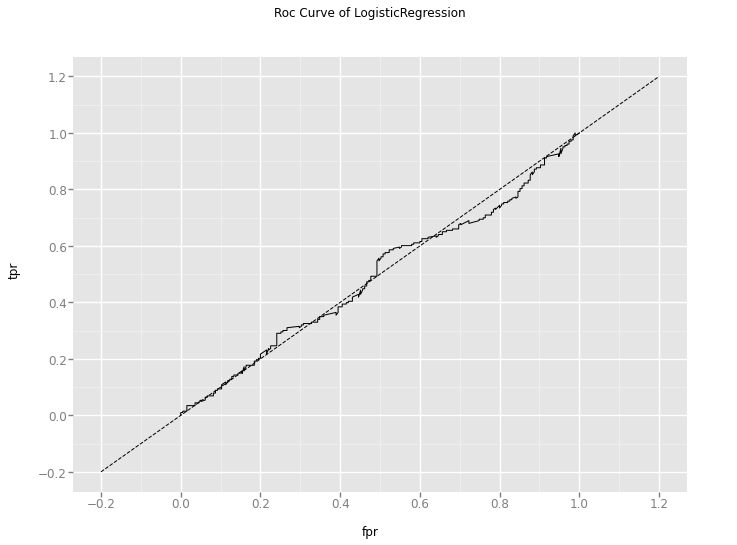

<ggplot: (8781886795475)>
Accuracy of KNeighborsClassifier is 0.507537688442211


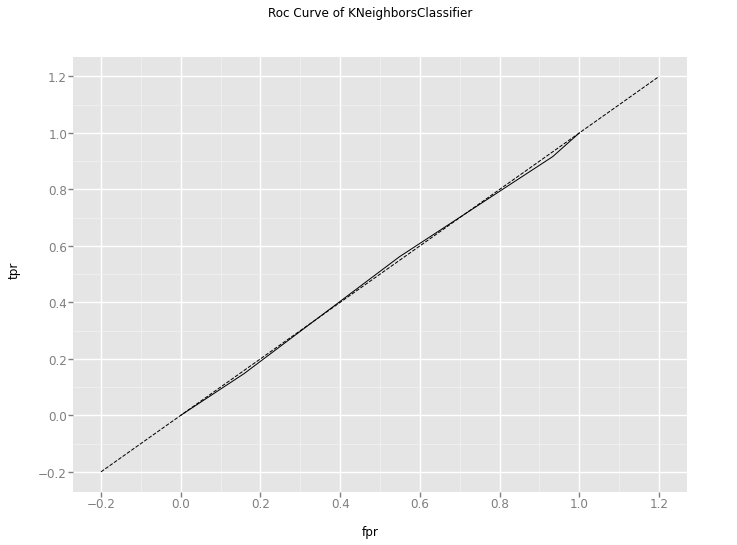

<ggplot: (8781980747058)>
Accuracy of SVC is 0.5100502512562815


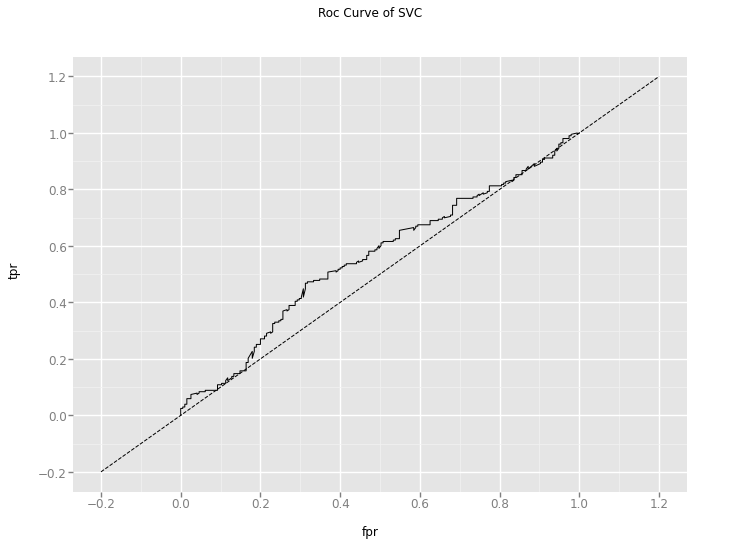

<ggplot: (-9223363254871357324)>
Accuracy of DecisionTreeClassifier is 0.5326633165829145


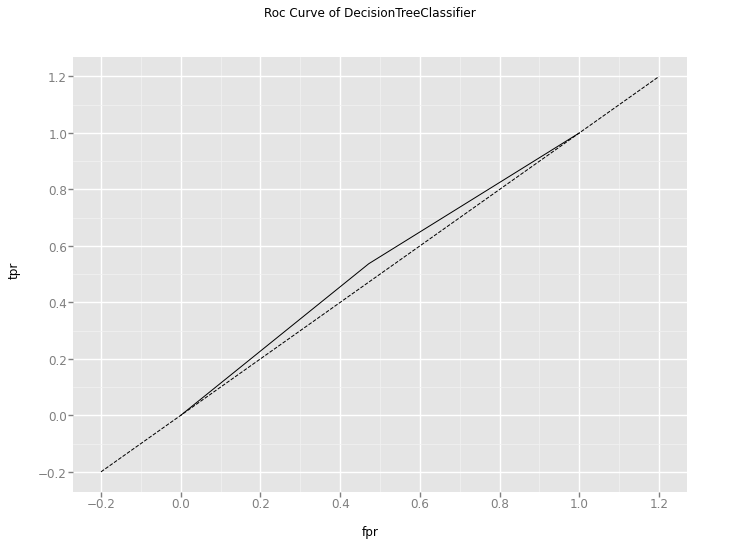

<ggplot: (8781886308349)>
Accuracy of RandomForestClassifier is 0.4824120603015075


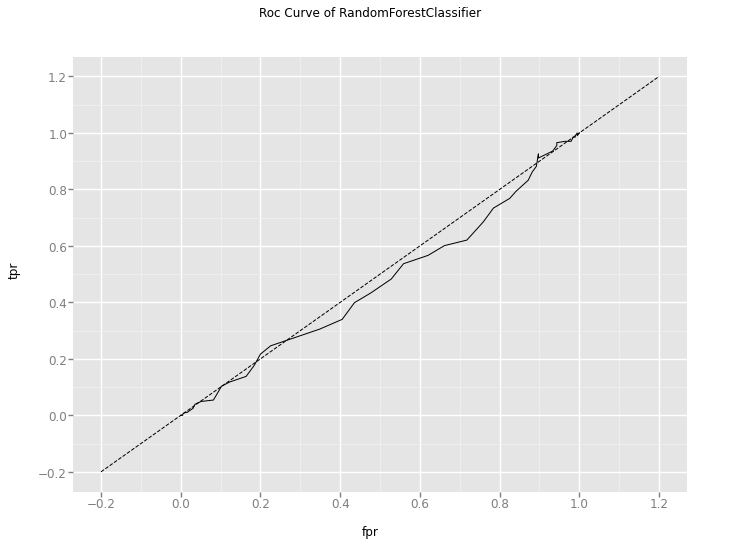

<ggplot: (8781982269602)>
Accuracy of AdaBoostClassifier is 0.4623115577889447


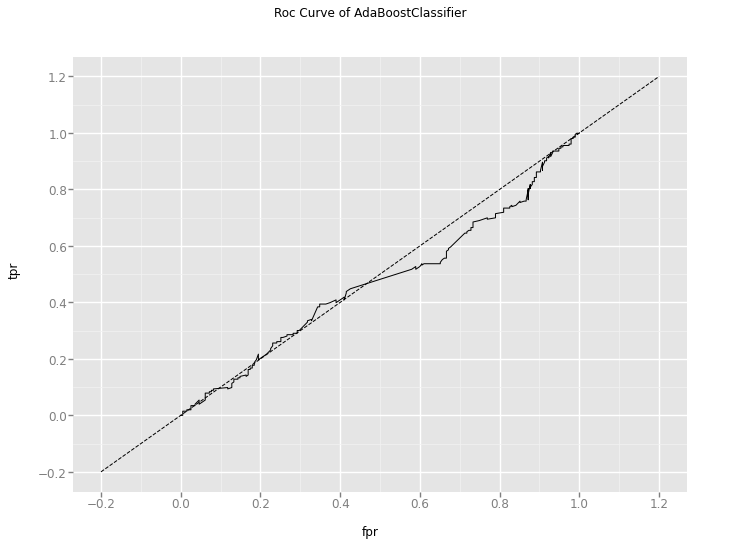

<ggplot: (8781883289906)>
Accuracy of GaussianNB is 0.5


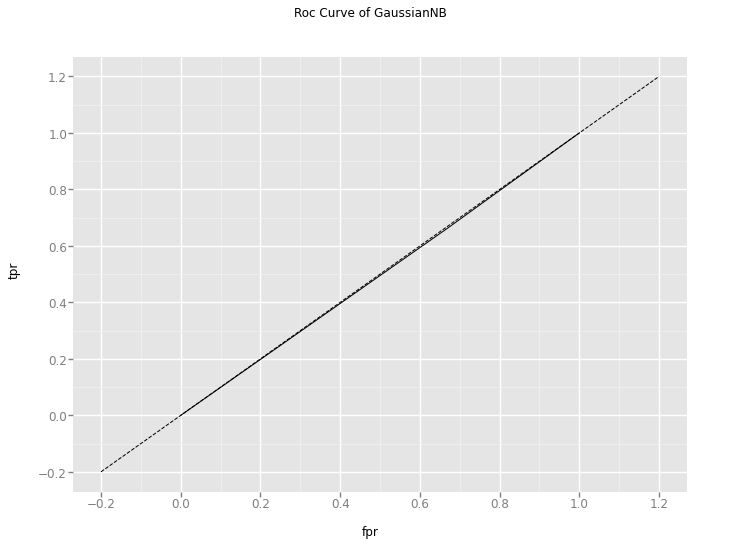

<ggplot: (8781883354709)>


In [416]:
"""
Output of the Classifiers, Accuracy and ROC curves

*takes a bit of time to run
"""

dense_features=train_features.toarray()
dense_test= test_features.toarray()

Accuracy=[]
Model=[]

for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['Label'])
        pred = fit.predict(test_features)
        prob = fit.predict_proba(test_features)[:,1]
    except Exception:
        fit = classifier.fit(dense_features,train['Label'])
        pred = fit.predict(dense_test)
        prob = fit.predict_proba(dense_test)[:,1]
    
    accuracy = accuracy_score(pred,test['Label'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    fpr, tpr, _ = roc_curve(test['Label'],prob)
    tmp = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    g = ggplot(tmp, aes(x='fpr', y='tpr')) +geom_line() +geom_abline(linetype='dashed')+ ggtitle('Roc Curve of '+classifier.__class__.__name__)
    print (g)

# Stock Predictions Using LSTM (Long Short Term Memory)

https://medium.com/@randerson112358/stock-price-prediction-using-python-machine-learning-e82a039ac2bb

In [417]:
"""
Import Libraries
"""
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [418]:
djia.sort_values(by = ['Date'], inplace=True, ascending=True)
djia.reset_index(drop=True, inplace=True)

Next, we will next using DJIA data to run quantitative analysis with the stock data.

In [419]:
djia.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [420]:
djia.shape

(1989, 7)

Data has 1989 rows and 7 columns [Date, Open, High, Low, Close,Volumne, Adj Close)  

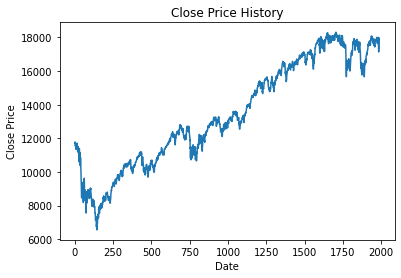

In [421]:
plt.title('Close Price History')
plt.plot(djia['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [422]:
data = djia.filter(['Close'])
dataset = data.values
training_data = math.ceil(len(dataset) * .8)
#https://www.geeksforgeeks.org/python-math-ceil-function/
#math.ceil rounds up to a whole number (instead of retaining decimal)

training_data

1592

Therfore, 80% of data is 1592 data points (compared to 1989 total)

In [423]:
#Scale (normalize) the data
"""
Instead of using actual prices of stocks,
for compatible data for machine learning, 
they will be scaled (normalized) to 0 to 1
"""

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.4408942 ],
       [0.44497647],
       [0.43308732],
       ...,
       [0.9474974 ],
       [0.96749772],
       [0.96914484]])

This result makes sense since from 2008 to 2016, we can observe DOW continually rising. 

In [424]:
"""
Creating training dataset
"""
#from scaled_data(100%), obtain rows and columns of training (80%)
train_data = scaled_data[0:training_data,:]

#split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.4408942 , 0.44497647, 0.43308732, 0.42377949, 0.43083154,
       0.43456885, 0.41922626, 0.40810547, 0.41395995, 0.41504621,
       0.43186252, 0.41130982, 0.41357241, 0.42119137, 0.43926733,
       0.42471444, 0.42241616, 0.42377269, 0.39447907, 0.39726092,
       0.42189092, 0.39809137, 0.4013373 , 0.4153437 , 0.41434757,
       0.37146905, 0.38349673, 0.34530324, 0.38015394, 0.41149599,
       0.37981395, 0.36608545, 0.36362059, 0.3803553 , 0.39064572,
       0.32454652, 0.36578714, 0.36412209, 0.33452493, 0.32114072,
       0.28970263, 0.24649184, 0.2304268 , 0.17272263, 0.16184322,
       0.24143462, 0.23492226, 0.17261381, 0.20672669, 0.19592887,
       0.23104982, 0.21135047, 0.16762457, 0.18224718, 0.15570313,
       0.13843375, 0.21402443, 0.20772115, 0.22384737, 0.23611385])]
[0.23567360397129578]



The printout is a sample of the first run through. xtrain will have 0-60 and xytrain will have the 61st on the first run. 

In [425]:
#Convert x_train and y_train to numpy arrays to be trained for LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [426]:
#Current shape of x_train
x_train.shape

(1532, 60)

In [427]:
#Reshape the data to #D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
#(number of samples, number of timestamps, number of features[closing price])
x_train.shape

(1532, 60, 1)

In [428]:
"""
Build LSTM (Long Short Term Memory) model
"""
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
#50 neurons, first layer requires the input_shape
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [429]:
"""
Compile model
"""
model.compile(optimizer='adam', loss="mean_squared_error")

In [430]:
"""
Train model
"""
model.fit(x_train, y_train, batch_size=1, epochs=1)
#batch size -> total # of training examples present in a single batch
#epochs -> # of iterations when the entire dataset is passed forward to a neural network

Epoch 1/1
1532/1532 [==============================] - 67s 43ms/step - loss: 0.0021


Noticed significant performance boost with TPU (Tensor Processing Unit) which can be enabled at Colabs. 

Edit -> Notebook settings 

Then enable hardware accelator

In [431]:
"""
Create test data set
(crate array containing scaled values from index 1533 to 1989)
"""
test_data = scaled_data[training_data - 60: , : ]

In [432]:
"""
create x_test and y_test
"""
x_test = []
y_test = dataset[training_data: , : ]

In [433]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [434]:
"""
Convert data to a numpy array
"""
x_test = np.array(x_test)

In [435]:
"""
Reshape the data
"""
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#(number of samples, number of timestamps, number of features[closing price])

In [436]:
"""
Get models predicted price values
"""
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [437]:
"""
Get RMSE (Root Mean Squared Error)

method of validation of model.
STD Dev of the residuals. 
Lower values indidcate a better fit (depends on datum range)
Model is a good match if RMSE is similar to training/testing
"""

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))  
rmse

638.2232700702098

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


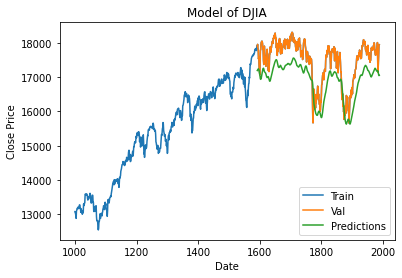

In [438]:
"""
Plot the data
"""
train = data[0:training_data]
valid = data[training_data: ]
valid['Predictions'] = predictions

plt.title("Model of DJIA")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(djia['Close'][1000:])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [439]:
"""
Display valid (actual) and predicted prices
"""
valid 

,Close,Predictions
1592,17900.099609,17194.699219
1593,17958.789062,17211.062500
1594,17852.480469,17229.785156
1595,17801.199219,17240.804688
1596,17533.150391,17243.765625
1597,17596.339844,17223.689453
1598,17280.830078,17197.892578
1599,17180.839844,17148.363281
1600,17068.869141,17083.796875
1601,17356.869141,17007.964844


# Stock Prediction Using SVR (Support Vector Regression)

https://medium.com/@randerson112358/predict-stock-prices-using-python-machine-learning-53aa024da20a

In [440]:
"""
Import libraries
"""
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

We will use DJIA as the data for stock analysis

In [441]:
djia.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


In [442]:
"""
Get the close price
"""
df = djia[['Close']] 
#[] is just extracting element, [[]] takes column of dataframe
df.head(2)

,Close
0,11734.320312
1,11782.349609


In [443]:
"""
Variable to predict # of days out into the future
"""
future_days = 25

In [444]:
"""
Create new column onto 'df' Prediction
"""
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(26)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Close,Prediction
0,11734.320312,10917.509766
1,11782.349609,11059.019531
2,11642.469727,10609.660156
3,11532.959961,11019.690430
4,11615.929688,11388.440430
5,11659.900391,11015.690430
6,11479.389648,10854.169922
7,11348.549805,10825.169922
8,11417.429688,11022.059570
9,11430.209961,11143.129883


Notice that the first value for Prediction is row 25 on "Close"

In [445]:
"""
Create the feature data 
"""
X = np.array(df.drop(['Prediction'],1))[ :-future_days]
print(X)

[[11734.320312]
 [11782.349609]
 [11642.469727]
 ...
 [17706.050781]
 [17851.509766]
 [17828.289062]]


In [446]:
"""
Create target data and convert it to numpy array and get all of the required target values
"""
#the last 
y = np.array(df['Prediction'])[:-future_days]
print(y)

[10917.509766 11059.019531 10609.660156 ... 17694.679688 17929.990234
 17949.369141]


In [447]:
"""
Split data
75% Training and 25% Testing
"""
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
#X = feature dataset, y = target dataset

In [448]:
"""
Create the models
"""

"""
Decision Tree Regressor model
"""
tree = DecisionTreeRegressor().fit(x_train, y_train)

"""
Linear Regression model
"""
lr = LinearRegression().fit(x_train, y_train)

In [449]:
"""
Last 
"""
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future 

array([[18003.75    ],
       [17977.240234],
       [17990.320312],
       [18041.550781],
       [17830.759766],
       [17773.640625],
       [17891.160156],
       [17750.910156],
       [17651.259766],
       [17660.710938],
       [17740.630859],
       [17705.910156],
       [17928.349609],
       [17711.119141],
       [17720.5     ],
       [17535.320312],
       [17710.710938],
       [17529.980469],
       [17526.619141],
       [17435.400391],
       [17500.939453],
       [17492.929688],
       [17706.050781],
       [17851.509766],
       [17828.289062]])

In [450]:
"""
Display model tree prediction
"""
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[17492.929688 17787.199219 17789.669922 17838.560547 17729.210938
 17920.330078 17938.279297 18005.050781 17985.189453 17865.339844
 17732.480469 17674.820312 18000.400391 17733.099609 16416.580078
 17804.869141 17829.730469 17780.830078 18011.070312 17400.75
 17140.240234 16167.230469 17694.679688 16285.509766 17949.369141]


In [451]:
"""
Display model linear regression prediction
"""
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[18056.07557695 18029.81583004 18042.77254712 18093.51985097
 17884.71684964 17828.13641107 17944.54759106 17805.62031783
 17706.90975127 17716.27178731 17795.437967   17761.04472213
 17981.38630264 17766.20458012 17775.4969663  17592.06374624
 17765.80022697 17586.77426441 17583.44463779 17493.08619069
 17558.00714024 17550.07291699 17761.18402087 17905.27115209
 17882.26944736]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


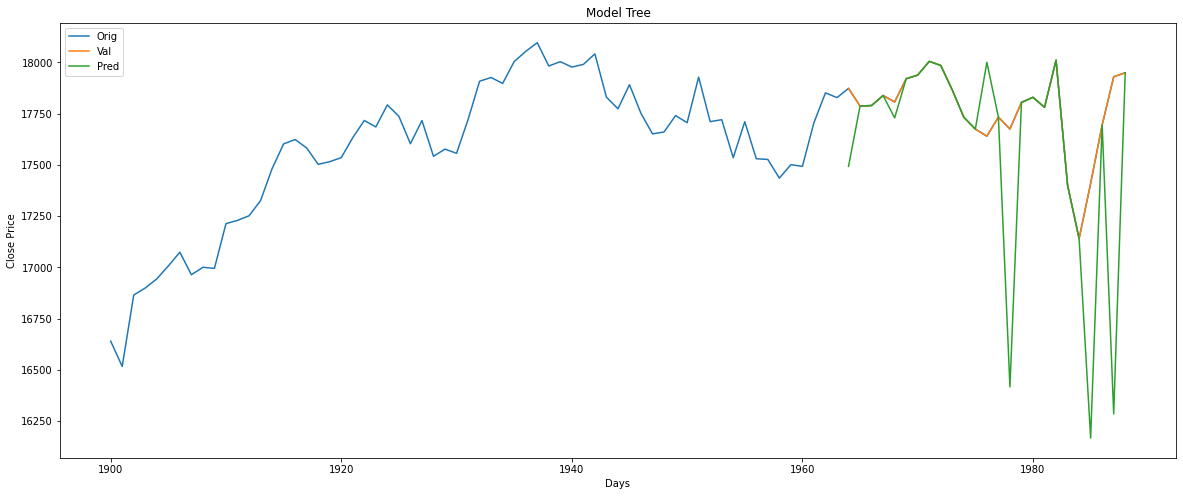

In [452]:
"""
Visualize data for Tree
"""
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(20,8))
plt.title('Model Tree')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'][1900:])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


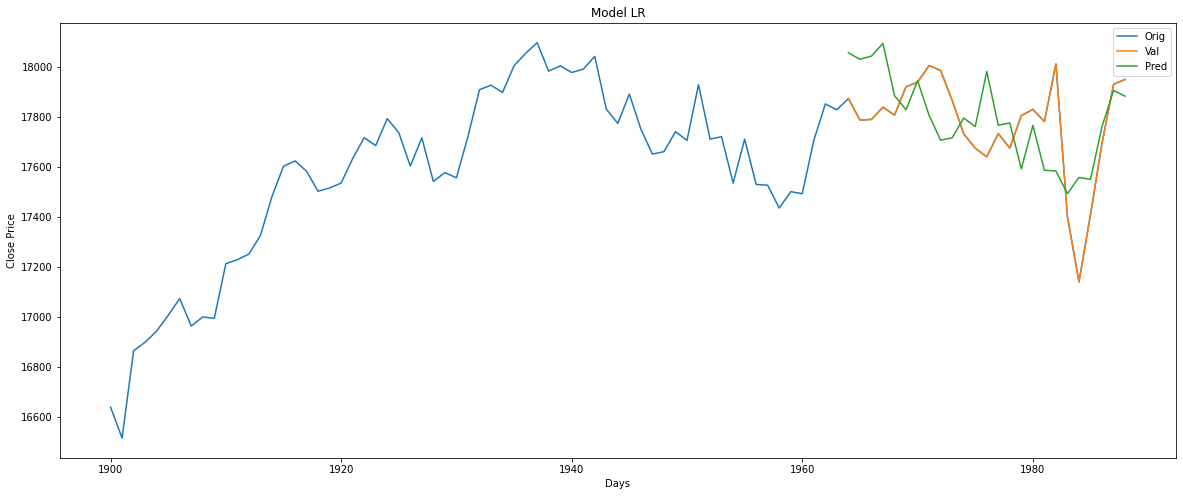

In [453]:
"""
Visualize data for LR
"""
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(20,8))
plt.title('Model LR')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'][1900:])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

Based on crude observation, it appears that the linear model is a better fit for the dataset.